# Time-series modeling of Rwanda's GDP 

**The dataset was obtained from the World Bank website with 64 observations from 1964 up to 2023**

**1.Initializing the given data**

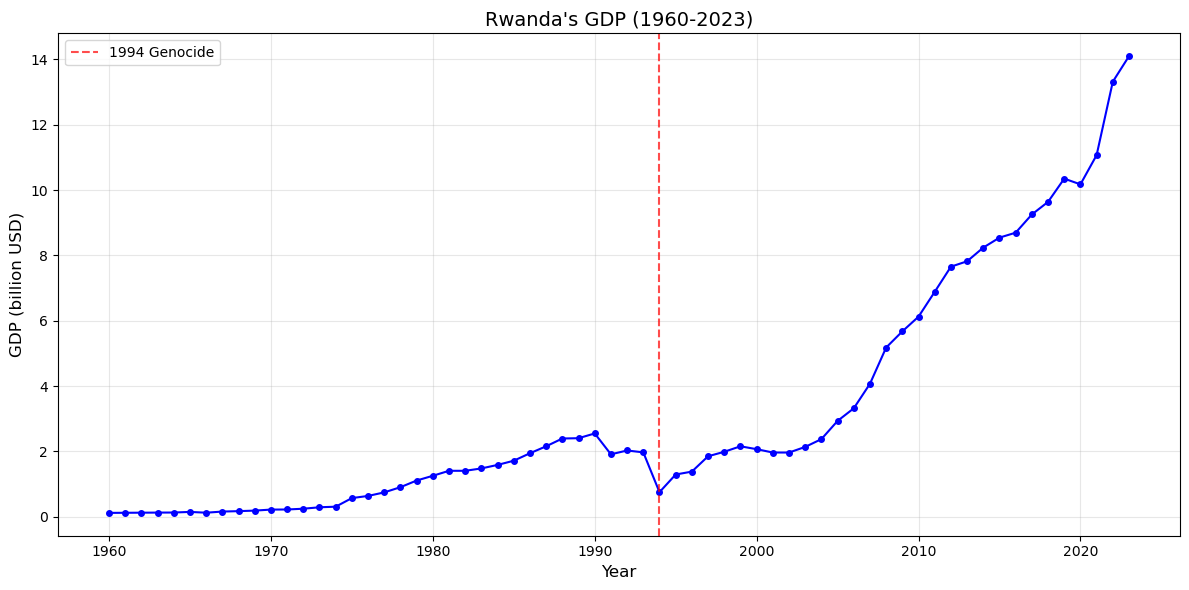

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a pandas DataFrame with the Rwanda GDP data
years = list(range(1960, 2024))
gdp_values = [
    119000024, 122000016, 125000008, 128000000, 129999994, 148799980, 124525702.857143, 159560018, 172200018, 188700037, 
    219900006, 222952504.40607, 246457838.336681, 290746157.145921, 308458423.183854, 571863500.248658, 637753853.12552, 
    746650613.034794, 905709076.42303, 1109346130.95265, 1254765641.52116, 1407062526.91521, 1407243139.2545, 1479687586.94292, 
    1587413083.9206, 1715626330.59472, 1944710683.87148, 2157432667.61598, 2395492686.78165, 2405022593.05165, 2550185679.08109, 
    1911600236.67461, 2029026961.55894, 1971525711.83511, 753636370.454545, 1293535193.49248, 1382334879.40812, 1851558197.31088, 
    1989343546.17594, 2157108262.84452, 2068836754.37431, 1966600715.49841, 1966003468.49117, 2138237278.73822, 2376496067.01198, 
    2933819766.17656, 3319784538.73346, 4070507894.61656, 5179854064.57033, 5674476969.06444, 6124756654.12346, 6884913658.10632, 
    7654761573.54991, 7819963715.75353, 8238966063.86692, 8543759677.58157, 8695272300.91019, 9252834336.49492, 9637904655.17446, 
    10349300380.33, 10174387374.3478, 11069280649.6459, 13316160895.0447, 14097768472.1883
]

data = pd.DataFrame({
    'Year': years,
    'GDP': gdp_values
})

# Convert GDP to billions for easier visualization
data['GDP_billions'] = data['GDP'] / 1e9

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['GDP_billions'], 'b-', marker='o', markersize=4)
plt.title("Rwanda's GDP (1960-2023)", fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (billion USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axvline(x=1994, color='r', linestyle='--', alpha=0.7, label='1994 Genocide')
plt.legend()
plt.tight_layout()
plt.show()

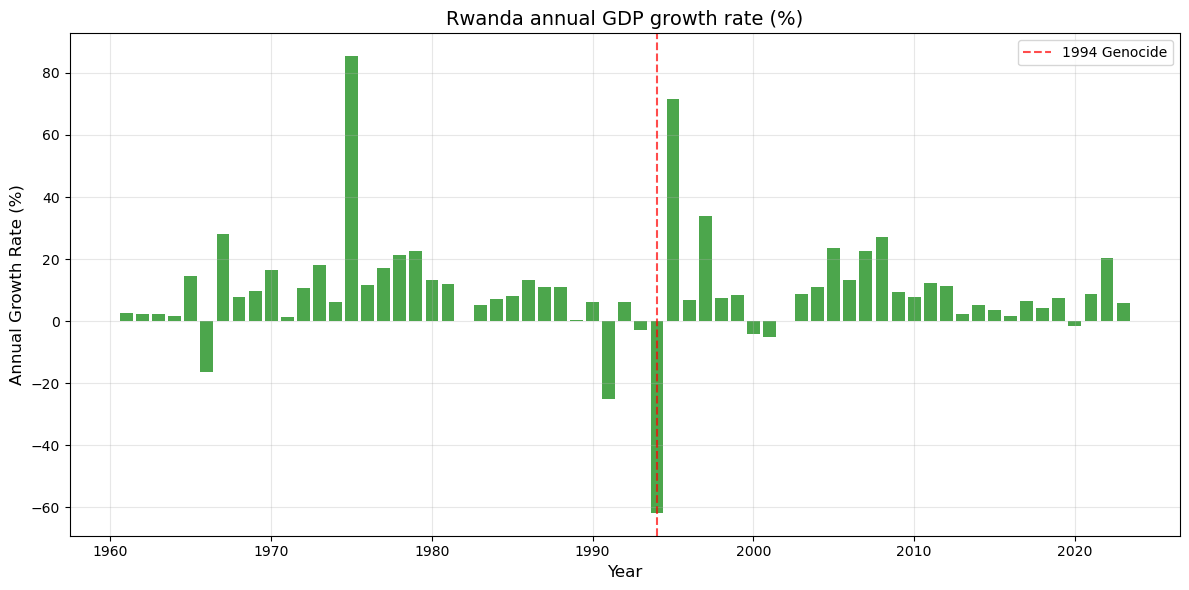

In [2]:
# Calculate annual growth rates
data['GDP_growth'] = data['GDP'].pct_change() * 100

# Plot growth rates
plt.figure(figsize=(12, 6))
plt.bar(data['Year'][1:], data['GDP_growth'][1:], color='green', alpha=0.7)
plt.title('Rwanda annual GDP growth rate (%)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual Growth Rate (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axvline(x=1994, color='r', linestyle='--', alpha=0.7, label='1994 Genocide')
plt.legend()
plt.tight_layout()
plt.show()

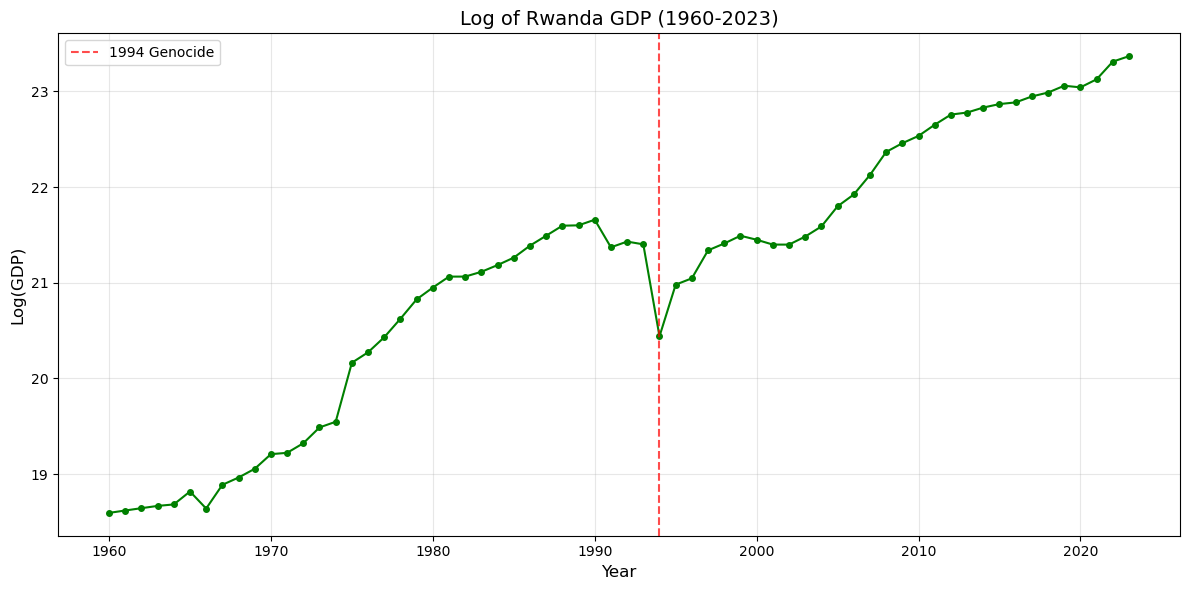

In [3]:
# Log transform for stabilizing variance
data['Log_GDP'] = np.log(data['GDP'])

# Plot log-transformed series
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Log_GDP'], 'g-', marker='o', markersize=4)
plt.title('Log of Rwanda GDP (1960-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Log(GDP)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axvline(x=1994, color='r', linestyle='--', alpha=0.7, label='1994 Genocide')
plt.legend()
plt.tight_layout()
plt.show()

**Stationarity test function**


Stationarity Tests for Original Log GDP
ADF Test Statistic: -0.8163
p-value: 0.8143
Critical Values:
	1%: -3.5387
	5%: -2.9086
	10%: -2.5919
ADF Conclusion: Non-Stationary

KPSS Test Statistic: 1.0748
p-value: 0.0100
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390
KPSS Conclusion: Non-Stationary


Stationarity Tests for First Difference of Log GDP
ADF Test Statistic: -9.0066
p-value: 0.0000
Critical Values:
	1%: -3.5405
	5%: -2.9094
	10%: -2.5923
ADF Conclusion: Stationary

KPSS Test Statistic: 0.0980
p-value: 0.1000
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390
KPSS Conclusion: Stationary


Stationarity Tests for Second Difference of Log GDP
ADF Test Statistic: -10.6096
p-value: 0.0000
Critical Values:
	1%: -3.5444
	5%: -2.9111
	10%: -2.5932
ADF Conclusion: Stationary

KPSS Test Statistic: 0.2843
p-value: 0.1000
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390
KPSS Conclusion: Stationary



/var/folders/x9/b0n9_98d1ns3rq2lx5bnq84m0000gn/T/ipykernel_8252/3863121536.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna())
/var/folders/x9/b0n9_98d1ns3rq2lx5bnq84m0000gn/T/ipykernel_8252/3863121536.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna())
/var/folders/x9/b0n9_98d1ns3rq2lx5bnq84m0000gn/T/ipykernel_8252/3863121536.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna())


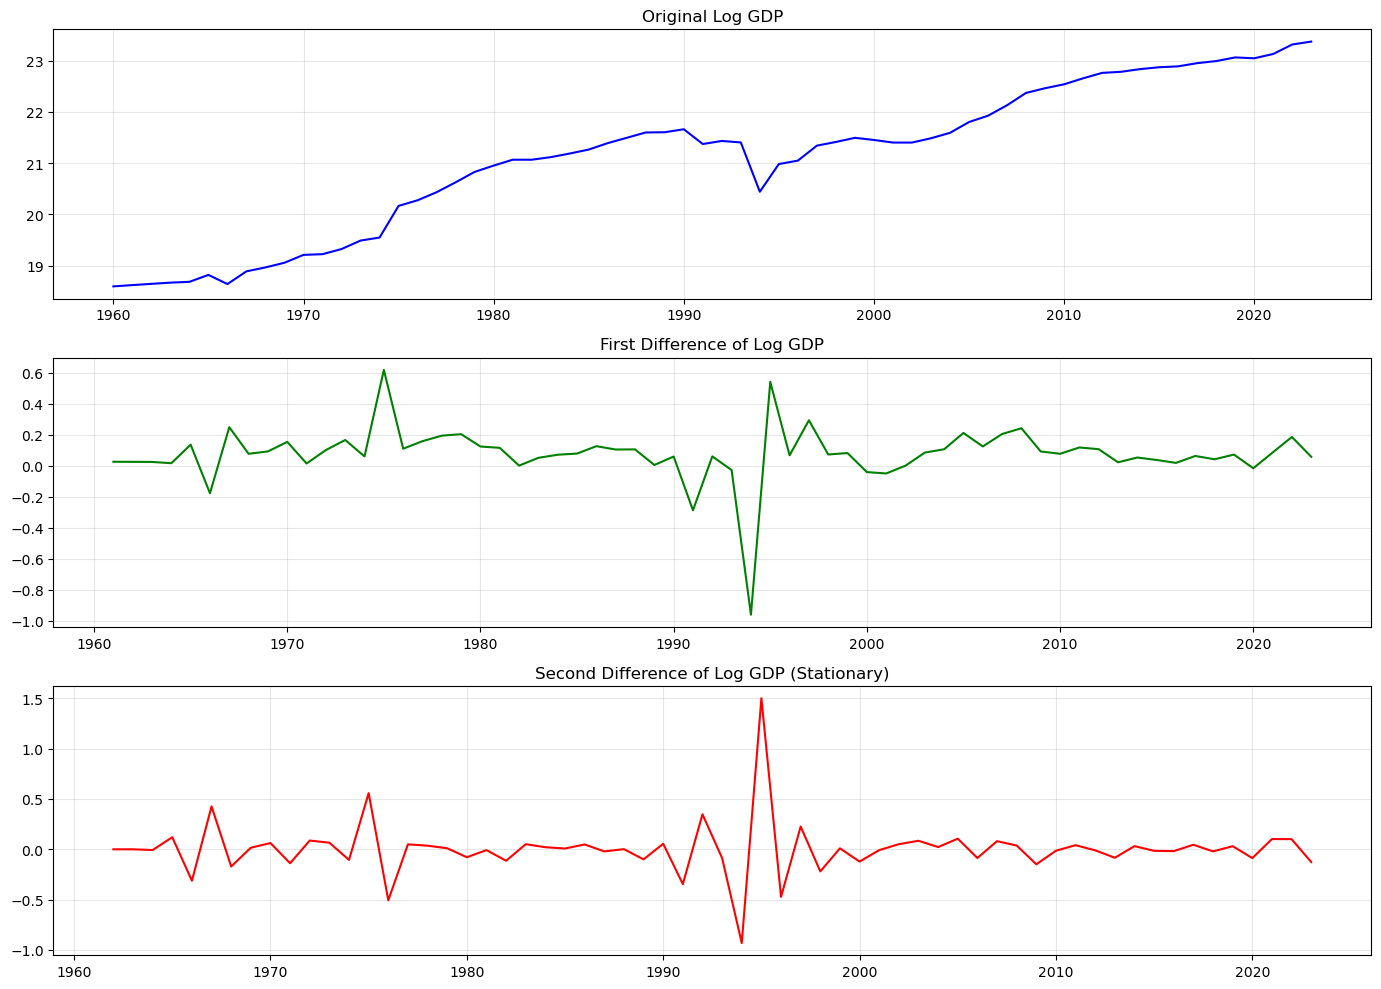

In [4]:

def stationarity_tests(series, title):
    print(f"\nStationarity Tests for {title}")
    
    # ADF Test
    result = adfuller(series.dropna())
    print(f'ADF Test Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    print("ADF Conclusion: " + ("Stationary" if result[1] < 0.05 else "Non-Stationary"))
    
    # KPSS Test
    result = kpss(series.dropna())
    print(f'\nKPSS Test Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[3].items():
        print(f'\t{key}: {value:.4f}')
    print("KPSS Conclusion: " + ("Non-Stationary" if result[1] < 0.05 else "Stationary"))
    print("\n" + "="*60)

# Test original series
stationarity_tests(data['Log_GDP'], 'Original Log GDP')

# First difference
data['Log_GDP_diff1'] = data['Log_GDP'].diff()
stationarity_tests(data['Log_GDP_diff1'], 'First Difference of Log GDP')

# Second difference
data['Log_GDP_diff2'] = data['Log_GDP_diff1'].diff()
stationarity_tests(data['Log_GDP_diff2'].dropna(), 'Second Difference of Log GDP')

# Plot transformations
plt.figure(figsize=(14, 10))

# Original series
plt.subplot(3, 1, 1)
plt.plot(data['Year'], data['Log_GDP'], 'b-')
plt.title('Original Log GDP')
plt.grid(True, alpha=0.3)

# First difference
plt.subplot(3, 1, 2)
plt.plot(data['Year'][1:], data['Log_GDP_diff1'][1:], 'g-')
plt.title('First Difference of Log GDP')
plt.grid(True, alpha=0.3)

# Second difference
plt.subplot(3, 1, 3)
plt.plot(data['Year'][2:], data['Log_GDP_diff2'][2:], 'r-')
plt.title('Second Difference of Log GDP (Stationary)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Autocorrelation & Partial correlation functions**

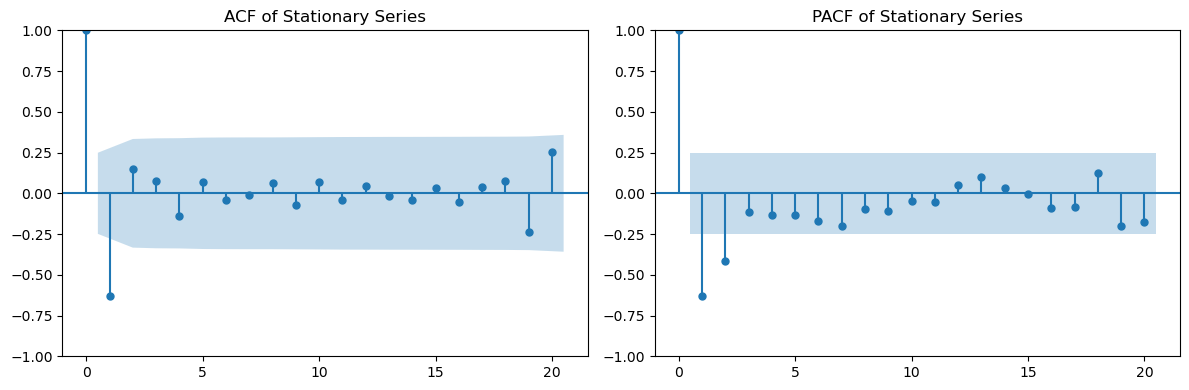

In [6]:
# ACF/PACF of stationary series
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(data['Log_GDP_diff2'].dropna(), lags=20, ax=ax1, title='ACF of Stationary Series')
plot_pacf(data['Log_GDP_diff2'].dropna(), lags=20, ax=ax2, title='PACF of Stationary Series')
plt.tight_layout()
plt.show()

**Checking Residuals**

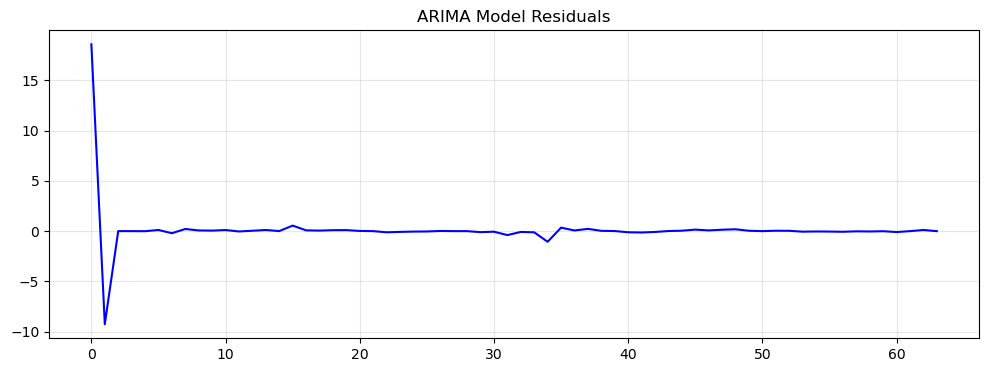

In [107]:
# Check residuals from ARIMA
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Log_GDP'], order=(1,2,1))  # replace (p,d,q) with your chosen values
arima_results = model.fit()

residuals = arima_results.resid
plt.figure(figsize=(12, 4))
plt.plot(residuals, 'b-')
plt.title('ARIMA Model Residuals')
plt.grid(True, alpha=0.3)
plt.show()

**Residual diagnostics**

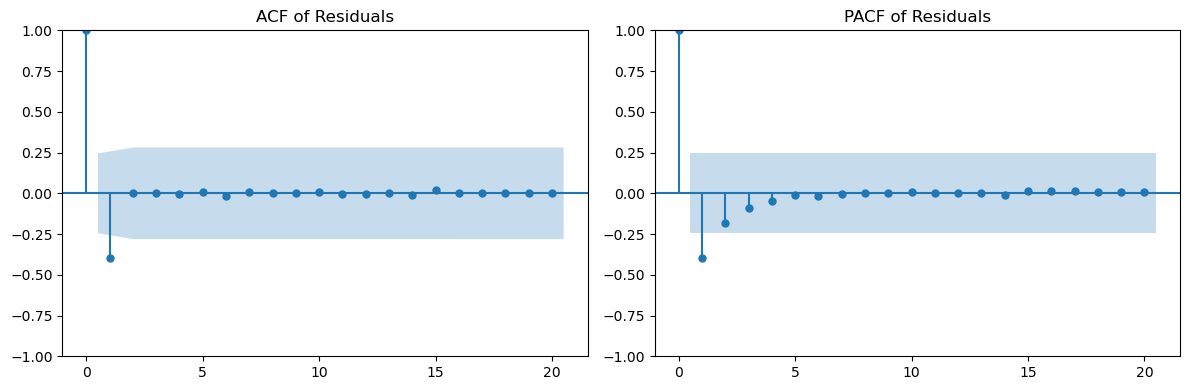

In [109]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(residuals.dropna(), lags=20, ax=ax1, title='ACF of Residuals')
plot_pacf(residuals.dropna(), lags=20, ax=ax2, title='PACF of Residuals')
plt.tight_layout()
plt.show()

In [113]:
from statsmodels.tsa.arima.model import ARIMA

# Drop NA from second differencing
log_gdp = data['Log_GDP'].dropna()

# Fit ARIMA model (adjust (p,d,q) based on ACF/PACF; here using (1,2,1) as an example)
model = ARIMA(log_gdp, order=(1,2,1))
fitted_model = model.fit()

# Print summary
print(fitted_model.summary())


                               SARIMAX Results                                
Dep. Variable:                Log_GDP   No. Observations:                   64
Model:                 ARIMA(1, 2, 1)   Log Likelihood                  15.513
Date:                Fri, 16 May 2025   AIC                            -25.026
Time:                        23:20:14   BIC                            -18.645
Sample:                             0   HQIC                           -22.520
                                 - 64                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1339      0.150     -0.893      0.372      -0.428       0.160
ma.L1         -0.9969      1.154     -0.863      0.388      -3.260       1.266
sigma2         0.0331      0.034      0.971      0.3

In [115]:
# Forecast in log space
forecast_log = fitted_model.predict(start=2, end=len(data)-1)  # Adjust for d=2

# Exponentiate to revert log-transform
forecast = np.exp(forecast_log)
actual = data['GDP'].iloc[2:].values  # Align with forecast

# Create DataFrame for comparison
results = pd.DataFrame({
    'Year': data['Year'].iloc[2:],
    'Actual_GDP': actual,
    'Forecast_ARIMA': forecast
})

**Evaluation of the model**

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_arima = mean_absolute_error(results['Actual_GDP'], results['Forecast_ARIMA'])
rmse_arima = np.sqrt(mean_squared_error(results['Actual_GDP'], results['Forecast_ARIMA']))

mean_gdp = np.mean(results['Actual_GDP'])
norm_mae_arima = mae_arima / mean_gdp
norm_rmse_arima = rmse_arima / mean_gdp

print(f"ARIMA Model Performance:")
print(f"MAE: ${mae_arima:,.2f}")
print(f"RMSE: ${rmse_arima:,.2f}")
print(f"Normalized MAE: {norm_mae_arima:.4f} ({norm_mae_arima*100:.2f}%)")
print(f"Normalized RMSE: {norm_rmse_arima:.4f} ({norm_rmse_arima*100:.2f}%)")


ARIMA Model Performance:
MAE: $221,571,524.81
RMSE: $382,731,198.82
Normalized MAE: 0.0668 (6.68%)
Normalized RMSE: 0.1154 (11.54%)


In [110]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from scipy import stats
import matplotlib.pyplot as plt

# Assuming 'results' is your DataFrame with 'Actual_GDP' and 'Forecast_ARIMA' columns

# 1. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(results['Actual_GDP'], results['Forecast_ARIMA'])
print(f"MAPE: {mape:.4f} ({mape*100:.2f}%)")

# 2. R-squared (Coefficient of Determination)
r2 = r2_score(results['Actual_GDP'], results['Forecast_ARIMA'])
print(f"R-squared: {r2:.4f}")

# 3. Theil's U Statistic
def theil_u(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # Calculate percent changes
    y_true_pct = np.diff(y_true) / y_true[:-1]
    y_pred_pct = np.diff(y_pred) / y_pred[:-1]
    # Calculate U statistic
    numerator = np.sqrt(np.mean((y_true_pct - y_pred_pct)**2))
    denominator = np.sqrt(np.mean(y_true_pct**2)) + np.sqrt(np.mean(y_pred_pct**2))
    return numerator / denominator

theil_u_value = theil_u(results['Actual_GDP'], results['Forecast_ARIMA'])
print(f"Theil's U Statistic: {theil_u_value:.4f}")
print("  - U = 0: Perfect forecast")
print("  - U = 1: Naive forecast")
print("  - U < 1: Better than naive forecast")
print("  - U > 1: Worse than naive forecast")

MAPE: 0.1105 (11.05%)
R-squared: 0.9889
Theil's U Statistic: 0.6599
  - U = 0: Perfect forecast
  - U = 1: Naive forecast
  - U < 1: Better than naive forecast
  - U > 1: Worse than naive forecast


In [118]:
from sklearn.metrics import mean_squared_error

# Calculate additional metrics
mse_arima = mean_squared_error(results['Actual_GDP'], results['Forecast_ARIMA'])
mfe_arima = np.mean(results['Actual_GDP'] - results['Forecast_ARIMA'])  # Mean Forecast Error

# Normalized versions (relative to mean GDP)
norm_mse_arima = mse_arima / (mean_gdp ** 2)
norm_mfe_arima = mfe_arima / mean_gdp

print(f"\nAdditional ARIMA Model Metrics:")
print(f"MSE: ${mse_arima:,.2f}")
print(f"MFE: ${mfe_arima:,.2f} (positive means under-forecasting, negative means over-forecasting)")
print(f"Normalized MSE: {norm_mse_arima:.4f}")
print(f"Normalized MFE: {norm_mfe_arima:.4f} ({norm_mfe_arima*100:.2f}%)")

# Interpretation of MFE
if mfe_arima > 0:
    print("The model tends to under-forecast GDP (predictions are lower than actual values)")
elif mfe_arima < 0:
    print("The model tends to over-forecast GDP (predictions are higher than actual values)")
else:
    print("The model has no systematic bias in forecasting")


Additional ARIMA Model Metrics:
MSE: $146,483,170,551,865,760.00
MFE: $-33,750,939.27 (positive means under-forecasting, negative means over-forecasting)
Normalized MSE: 0.0133
Normalized MFE: -0.0102 (-1.02%)
The model tends to over-forecast GDP (predictions are higher than actual values)


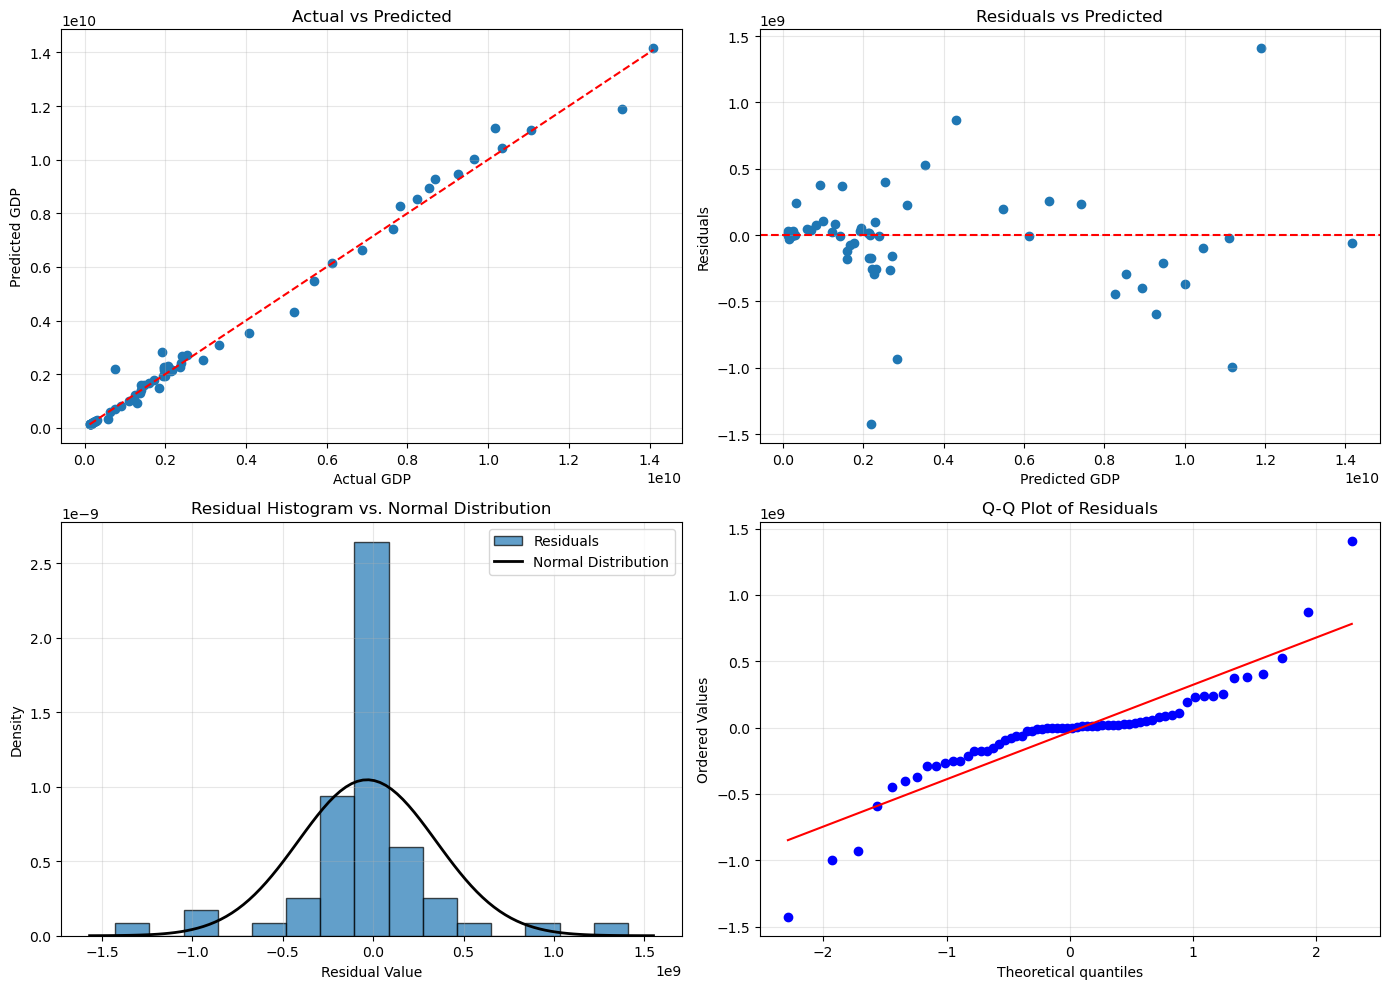

In [195]:
# 7. Visual evaluation - Residual analysis
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.figure(figsize=(14, 10))

# Plot 1: Actual vs Predicted
plt.subplot(2, 2, 1)
plt.scatter(results['Actual_GDP'], results['Forecast_ARIMA'])
plt.plot([results['Actual_GDP'].min(), results['Actual_GDP'].max()], 
         [results['Actual_GDP'].min(), results['Actual_GDP'].max()], 
         'r--')
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs Predicted')
plt.grid(True, alpha=0.3)

# Plot 2: Residuals
residuals = results['Actual_GDP'] - results['Forecast_ARIMA']
plt.subplot(2, 2, 2)
plt.scatter(results['Forecast_ARIMA'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted GDP')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.grid(True, alpha=0.3)

# Plot 3: Residual Histogram with Normal Curve
plt.subplot(2, 2, 3)
plt.hist(residuals, bins=15, edgecolor='black', density=True, alpha=0.7, label='Residuals')

# Calculate mean and std of residuals
mu, std = np.mean(residuals), np.std(residuals)

# Generate normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Plot normal curve
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.xlabel('Residual Value')
plt.ylabel('Density')
plt.title('Residual Histogram vs. Normal Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: QQ Plot of Residuals
plt.subplot(2, 2, 4)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<Figure size 1000x400 with 0 Axes>

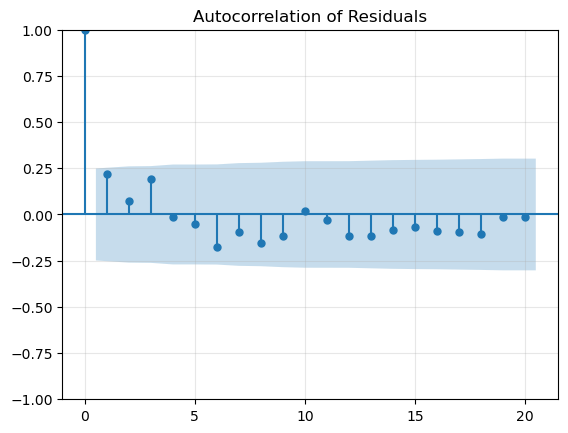

In [114]:
# 8. Autocorrelation of Residuals
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 4))
plot_acf(residuals.dropna(), lags=20)
plt.title('Autocorrelation of Residuals')
plt.grid(True, alpha=0.3)
plt.show()

**Table representating actual and simulated data**

In [33]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(data['Log_GDP'], order=(1,2,1))  
model_fit = model.fit()

#access fitted values
fitted_values = model_fit.fittedvalues

In [164]:
# Generate fitted values, in-sample predictions
fitted_values = model_fit.fittedvalues

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Year': data['Year'],
    'Actual_Log_GDP': data['Log_GDP'],
    'Fitted_Log_GDP': fitted_values
})

# Convert back from log-scale to GDP (billions)
comparison_df['Actual_GDP'] = np.exp(comparison_df['Actual_Log_GDP'])
comparison_df['Fitted_GDP'] = np.exp(comparison_df['Fitted_Log_GDP'])

# Set pandas to display full precision (up to 5 decimals)
pd.set_option('display.float_format', '{:.5f}'.format)  # Adjust decimal places as needed

# Display table
print(comparison_df[['Year', 'Actual_GDP', 'Fitted_GDP']].head(34))
print("\n...")
print(comparison_df[['Year', 'Actual_GDP', 'Fitted_GDP']].tail(30))

# Reset display options (optional)
pd.reset_option('display.float_format')

    Year       Actual_GDP          Fitted_GDP
0   1960  119000024.00000             1.00000
1   1961  122000016.00000 1298137072712.09351
2   1962  125000008.00000     125075738.16490
3   1963  128000000.00000     128117742.07667
4   1964  129999994.00000     131159041.71691
5   1965  148799980.00000     133040842.40807
6   1966  124525702.85714     153425290.25288
7   1967  159560018.00000     129133701.91449
8   1968  172200018.00000     161255726.83632
9   1969  188700037.00000     179590093.13039
10  1970  219900006.00000     197508567.82445
11  1971  222952504.40607     230802063.20509
12  1972  246457838.33668     237644462.83308
13  1973  290746157.14592     260480494.80744
14  1974  308458423.18385     307260343.97134
15  1975  571863500.24866     330737996.36966
16  1976  637753853.12552     590519638.53811
17  1977  746650613.03479     708397099.09599
18  1978  905709076.42303     826568028.77467
19  1979 1109346130.95265    1003053711.53498
20  1980 1254765641.52116    12335

**Diagnostic tests**

In [27]:
# 1. Normality of Log Returns (Actual GDP)
from scipy.stats import jarque_bera, shapiro

log_returns_actual = np.diff(np.log(gdp_values))
jb_test = jarque_bera(log_returns_actual)
shapiro_test = shapiro(log_returns_actual)
print(f"Jarque-Bera Test (Actual): p-value = {jb_test[1]:.4f}")
print(f"Shapiro-Wilk Test (Actual): p-value = {shapiro_test[1]:.4f}")

Jarque-Bera Test (Actual): p-value = 0.0000
Shapiro-Wilk Test (Actual): p-value = 0.0000


In [31]:
# 2. Autocorrelation (Ljung-Box Test)
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(log_returns_actual, lags=5)
print("Ljung-Box Test (Actual GDP Returns):")
print(lb_test)

Ljung-Box Test (Actual GDP Returns):
    lb_stat  lb_pvalue
1  1.467839   0.225687
2  2.969110   0.226603
3  3.801204   0.283746
4  4.451999   0.348277
5  4.469043   0.484036


In [54]:
# Forecast next 10 years (steps=10)
forecast = model_fit.get_forecast(steps=10)

# Extract predicted values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()  # 95% confidence intervals

# Convert log-GDP back to original scale (billions USD)
forecast_gdp = np.exp(forecast_values)
lower_bound = np.exp(conf_int.iloc[:, 0])
upper_bound = np.exp(conf_int.iloc[:, 1])

**Plot of actual data against the simulated data**

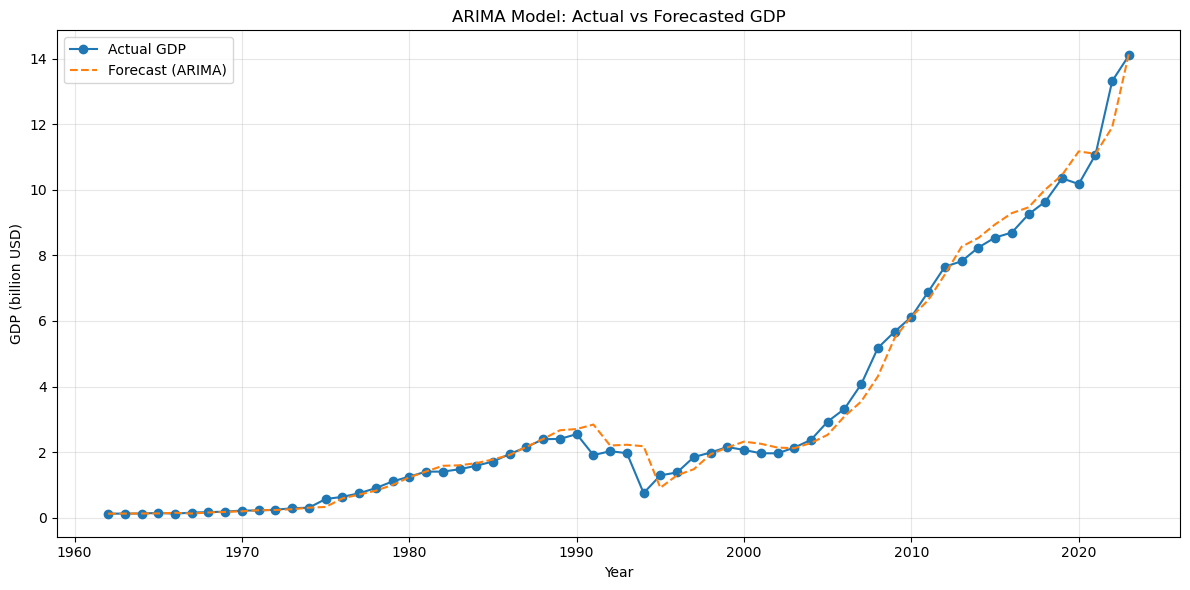

In [100]:
plt.figure(figsize=(12, 6))
plt.plot(results['Year'], results['Actual_GDP']/1e9, label='Actual GDP', marker='o')
plt.plot(results['Year'], results['Forecast_ARIMA']/1e9, label='Forecast (ARIMA)', linestyle='--')
plt.title("ARIMA Model: Actual vs Forecasted GDP")
plt.xlabel('Year')
plt.ylabel('GDP (billion USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Prediction of the next 10 years**

In [64]:
import pandas as pd
import numpy as np

# Generate future years (2024-2033)
future_years = range(2024, 2034)

# Create DataFrame
forecast_df = pd.DataFrame({
    'Year': future_years,
    'Forecast_GDP_billions': forecast_gdp,
    'Lower_CI': lower_bound,
    'Upper_CI': upper_bound
})

# Set pandas to display all digits without scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Shows 8 decimal places

# Print the DataFrame with full precision
print(forecast_df)

# (Optional) Reset to default pandas display settings afterward
pd.reset_option('display.float_format')

    Year  Forecast_GDP_billions        Lower_CI         Upper_CI
64  2024        14908599312.307 10388317184.610  21395797750.978
65  2025        15657140561.378  9570346623.138  25615169461.687
66  2026        16379429474.217  8643113390.935  31040401504.186
67  2027        17062414810.910  7826229691.148  37198754785.955
68  2028        17709055934.157  7057019649.601  44439533634.686
69  2029        18318108282.786  6349044846.994  52850956190.482
70  2030        18890224777.048  5699329236.483  62610980577.008
71  2031        19425982741.302  5107782819.437  73881137629.679
72  2032        19926388890.738  4572170273.150  86842998073.948
73  2033        20392638550.647  4089582775.997 101687563215.030


**Visualization showing the forecasting in the next 10 years**

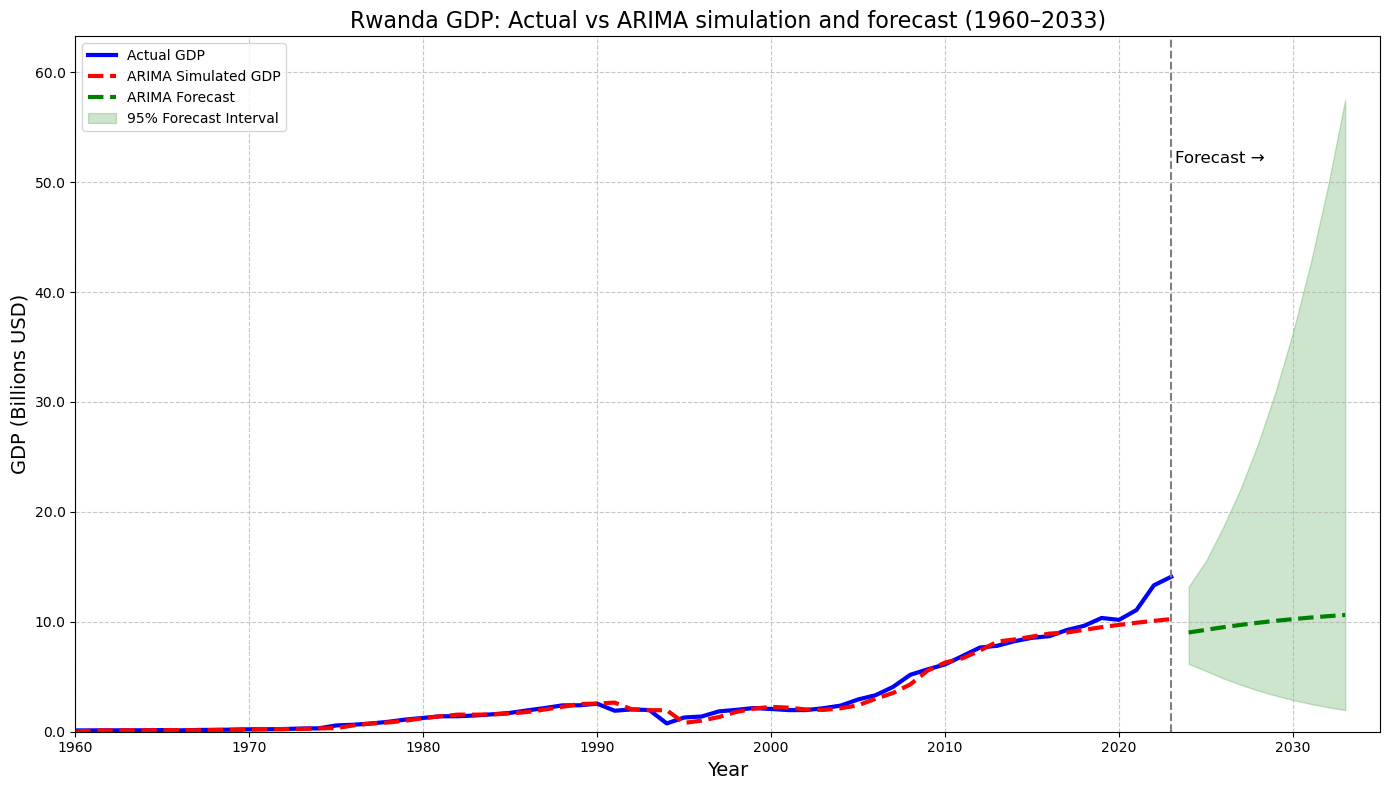

In [102]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(14, 8))

# Plot actual GDP (historical)
plt.plot(data['Year'], data['GDP_billions'], 'b-', linewidth=3, label='Actual GDP')

# Plot in-sample ARIMA simulated GDP
plt.plot(data['Year'], data['Simulated_GDP_billions'], 'r--', linewidth=3, label='ARIMA Simulated GDP')

# Plot ARIMA forecast
plt.plot(forecast_df['Year'], forecast_df['Forecast_GDP_billions'], 'g--', linewidth=3, label='ARIMA Forecast')

# Confidence Interval
plt.fill_between(forecast_df['Year'], 
                 forecast_df['Lower_CI_billions'], 
                 forecast_df['Upper_CI_billions'], 
                 alpha=0.2, color='g', label='95% Forecast Interval')

# Reference Lines
plt.axvline(x=2023, color='gray', linestyle='--')
plt.text(2023.2, forecast_df['Upper_CI_billions'].max() * 0.9, 'Forecast →', fontsize=12)


# Format y-axis
formatter = ticker.FuncFormatter(lambda x, _: f'{x:.1f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Aesthetics
plt.title("Rwanda GDP: Actual vs ARIMA simulation and forecast (1960–2033)", fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP (Billions USD)', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(1960, 2035)
plt.ylim(0, forecast_df['Upper_CI_billions'].max() * 1.1)
plt.tight_layout()

# Save and show
plt.savefig('rwanda_gdp_arima_simulation.png', dpi=300, bbox_inches='tight')
plt.show()
